In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
dataframe = pd.read_csv('/content/ML (1).csv',nrows=100)
print(dataframe)

           State Name  No. OfVillagesWhere SurveyCompleted  banks   ATM  \
0      ANDHRA PRADESH                                20040   3078  2220   
1   ARUNACHAL PRADESH                                 4623     96    57   
2               ASSAM                                26372   1867  1073   
3               BIHAR                                45265   7523  3619   
4        CHHATTISGARH                                19898   1373   664   
5                 GOA                                  403    176   158   
6             GUJARAT                                18391   5786  4899   
7             HARYANA                                 7500   1814   884   
8    HIMACHAL PRADESH                                19602   1401  1022   
9   JAMMU AND KASHMIR                                 7646    997   794   
10          JHARKHAND                                31212   2561  1288   
11          KARNATAKA                                32132   4153  2629   
12             KERALA    

In [ ]:
Village_Survey = []
for index,row in dataframe.iterrows():
  dataframe.loc[dataframe['No. OfVillagesWhere SurveyCompleted'] >= 50000, 'Village_Survey'] = '1'
  dataframe.loc[dataframe['No. OfVillagesWhere SurveyCompleted'] < 50000, 'Village_Survey'] = '0'

In [ ]:
dataframe.head()

,State Name,No. OfVillagesWhere SurveyCompleted,banks,ATM,Public Transport,electricity for domestic use (in Hrs),Public Distribution System(PDS),markets,Middle School,Aanganwadi Centre,NSDP,Village_Survey
0,ANDHRA PRADESH,20040,3078,2220,17594,19439,15267,3971,6438,17856,558862,0
1,ARUNACHAL PRADESH,4623,96,57,1249,3473,1952,431,780,3008,14897,0
2,ASSAM,26372,1867,1073,16867,23765,12452,8828,7363,21485,204627,0
3,BIHAR,45265,7523,3619,34505,42536,23271,18368,20734,35768,345545,0
4,CHHATTISGARH,19898,1373,664,10768,18479,11760,6836,10831,18730,209211,0


In [ ]:
Feature_Vectors = []
for index,row in dataframe.iterrows():
  temp = []
  temp.append(row['No. OfVillagesWhere SurveyCompleted'])
  temp.append(row['Aanganwadi Centre'])
  
  Feature_Vectors.append(temp)

In [ ]:
Village_Survey_Completed = []
Village_Survey_Not_Completed = []

for index,row in dataframe.iterrows():
  temp = []
  temp.append(row['No. OfVillagesWhere SurveyCompleted'])
  temp.append(row['Aanganwadi Centre'])
  
  if row['Village_Survey'] == 1:
    Village_Survey_Completed.append(temp)
  else:
    Village_Survey_Not_Completed.append(temp)

In [ ]:
np.mean(Village_Survey_Completed,axis=0)
np.mean(Village_Survey_Not_Completed,axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([22330.27586207, 17874.27586207])

In [ ]:
np.std(Village_Survey_Completed,axis=0)
np.std(Village_Survey_Not_Completed,axis=0)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([22467.20085368, 16477.5665677 ])

In [ ]:
centriod = np.linalg.norm(np.mean(Village_Survey_Completed,axis=0) - np.mean(Village_Survey_Not_Completed,axis=0))
centriod

nan

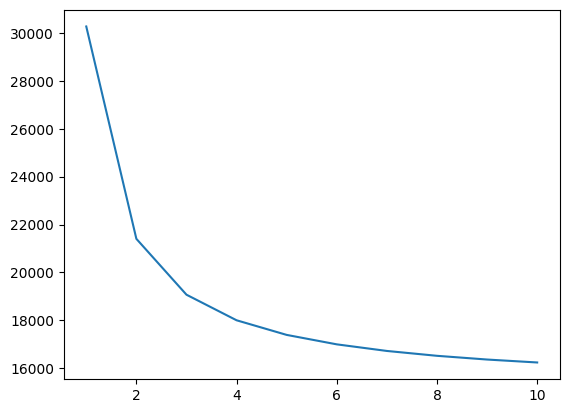

In [ ]:
distances = []
x= []
for i in range(1,11):
  distances.append(distance.minkowski(Feature_Vectors[0],Feature_Vectors[1],i))
  x.append(i)


plt.plot(x,distances)
plt.show()

In [ ]:
y = dataframe['Village_Survey']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Feature_Vectors,y,test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(list(Feature_Vectors),y)
neigh.score(X_test,y_test)
neigh.predict(X_test)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype=object)

In [ ]:
pred=neigh.predict(X_test)
pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype=object)

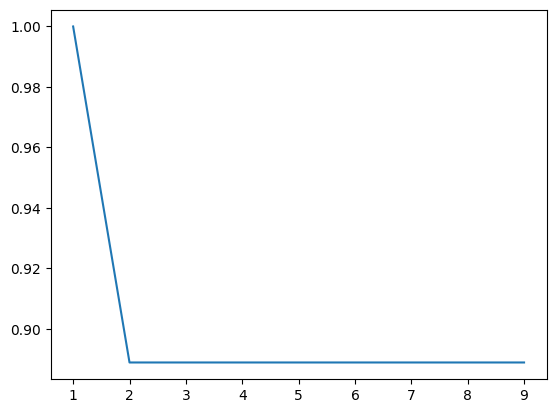

In [ ]:
scores = []
x = []
for i in range(1,10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(list(Feature_Vectors),y)
  scores.append(neigh.score(list(X_test),y_test))
  x.append(i)


plt.plot(x,scores)
plt.show()


In [ ]:
df = pd.read_excel('/content/Output (1).xlsx')
df

,State Name,No. OfVillagesWhere SurveyCompleted,banks,ATM,Public Transport,electricity for domestic use,Public Distribution System(PDS),markets,Middle School,Aanganwadi Centre,NSDP,classify
0,0,20040,3078,2220,17594,19439,15267,3971,6438,17856,558862,High
1,1,4623,96,57,1249,3473,1952,431,780,3008,14897,Low
2,2,26372,1867,1073,16867,23765,12452,8828,7363,21485,204627,Low
3,3,45265,7523,3619,34505,42536,23271,18368,20734,35768,345545,Low
4,4,19898,1373,664,10768,18479,11760,6836,10831,18730,209211,Low
5,5,403,176,158,371,391,236,78,170,331,47425,Low
6,6,18391,5786,4899,18104,18331,15324,13156,9649,17948,1034399,High
7,7,7500,1814,884,6052,7424,4792,1097,4712,7127,470328,High
8,8,19602,1401,1022,14805,18278,7294,2255,4035,12451,99218,Low
9,9,7646,997,794,6073,7461,4816,2189,5074,7072,93072,Low


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df2=df['NSDP']>= 405143
df3=df2.replace(to_replace=True,value='High')
df4=df3.replace(to_replace=False,value='Low')

In [ ]:
df['classify']=df4
x= df.drop('classify',axis=1)
y=df['classify']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(23, 11)
(6, 11)


In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(3,2),max_iter=10,activation='relu')
mlp

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=10)

In [ ]:

mlp.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=10)

In [ ]:
pred=mlp.predict(x_test)
pred

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low'], dtype='<U4')

In [ ]:
accuracy_score(y_test,pred)*100

33.33333333333333

In [ ]:
import time
t0 = time.time()
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)
print('MLP Score:',mlp.score(x_test,y_test))
t1 = time.time()
print("Time taken to train and test the set is", t1-t0)

MLP Score: 0.6666666666666666
Time taken to train and test the set is 0.020758867263793945


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
confusion_matrix(y_test,pred)

array([[0, 4],
       [0, 2]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
from sklearn.svm import SVC

clf = SVC()
print('clf fit : \n',clf.fit(x_train,y_train))
print('clf support_vectors : \n',clf.support_vectors_)

clf fit : 
 SVC()
clf support_vectors : 
 [[2.400000e+01 1.578700e+04 1.889000e+03 1.183000e+03 1.427400e+04
  1.526200e+04 1.154600e+04 1.931000e+03 5.126000e+03 1.470100e+04
  5.444410e+05]
 [1.200000e+01 1.596000e+03 1.447000e+03 1.322000e+03 1.593000e+03
  1.596000e+03 1.558000e+03 1.339000e+03 1.442000e+03 1.576000e+03
  5.107870e+05]
 [7.000000e+00 7.500000e+03 1.814000e+03 8.840000e+02 6.052000e+03
  7.424000e+03 4.792000e+03 1.097000e+03 4.712000e+03 7.127000e+03
  4.703280e+05]
 [2.100000e+01 4.569200e+04 3.883000e+03 2.861000e+03 2.856300e+04
  4.460900e+04 1.469400e+04 5.981000e+03 1.981100e+04 3.617700e+04
  5.681020e+05]
 [0.000000e+00 2.004000e+04 3.078000e+03 2.220000e+03 1.759400e+04
  1.943900e+04 1.526700e+04 3.971000e+03 6.438000e+03 1.785600e+04
  5.588620e+05]
 [1.400000e+01 4.373500e+04 5.341000e+03 3.475000e+03 3.573700e+04
  4.118100e+04 2.262500e+04 8.806000e+03 1.578200e+04 3.942400e+04
  1.728578e+06]
 [1.900000e+01 4.927200e+04 4.008000e+03 2.772000e+03 3.51

In [ ]:
import time
t0 = time.time()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)
print('SVM Score:',clf.score(x_test,y_test))
t1 = time.time()
print("Time taken to train and test the set is", t1-t0)

SVM Score: 1.0
Time taken to train and test the set is 0.019312381744384766


In [ ]:
print('clf score :',clf.score(x_train,y_train))

clf score : 1.0


In [ ]:
prediction=clf.predict(x_test)
prediction

array(['High', 'Low', 'High', 'High', 'High', 'Low'], dtype=object)

In [ ]:
accuracy_score(y_test,prediction)*100

100.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
df=pd.read_excel('Output (1).xlsx')
x=df.drop(['classify'],axis=1)
y=df['classify']
train_features,test_features,train_labels,test_labels= train_test_split(x, y, test_size=0.33)


clf = SVC()
print('clf fit : \n',clf.fit(train_features,train_labels))
print('clf support_vectors : \n',clf.support_vectors_)

clf fit : 
 SVC()
clf support_vectors : 
 [[2.800000e+01 3.971900e+04 5.477000e+03 3.420000e+03 2.975700e+04
  3.843900e+04 1.448600e+04 1.232300e+04 9.468000e+03 3.379700e+04
  6.592880e+05]
 [1.400000e+01 4.373500e+04 5.341000e+03 3.475000e+03 3.573700e+04
  4.118100e+04 2.262500e+04 8.806000e+03 1.578200e+04 3.942400e+04
  1.728578e+06]
 [7.000000e+00 7.500000e+03 1.814000e+03 8.840000e+02 6.052000e+03
  7.424000e+03 4.792000e+03 1.097000e+03 4.712000e+03 7.127000e+03
  4.703280e+05]
 [0.000000e+00 2.004000e+04 3.078000e+03 2.220000e+03 1.759400e+04
  1.943900e+04 1.526700e+04 3.971000e+03 6.438000e+03 1.785600e+04
  5.588620e+05]
 [2.400000e+01 1.578700e+04 1.889000e+03 1.183000e+03 1.427400e+04
  1.526200e+04 1.154600e+04 1.931000e+03 5.126000e+03 1.470100e+04
  5.444410e+05]
 [1.000000e+01 3.121200e+04 2.561000e+03 1.288000e+03 1.539100e+04
  2.897700e+04 1.096800e+04 8.670000e+03 9.822000e+03 2.204300e+04
  2.087010e+05]
 [2.000000e+00 2.637200e+04 1.867000e+03 1.073000e+03 1.68

In [ ]:
clf = SVC(kernel ='rbf', random_state = 0)
clf.fit(train_features,train_labels)
print('clf support vectors : \n',clf.support_vectors_)
print('clf score  : \n',clf.score(test_features,test_labels))
print('clf predict : \n',clf.predict(test_features))

clf support vectors : 
 [[2.800000e+01 3.971900e+04 5.477000e+03 3.420000e+03 2.975700e+04
  3.843900e+04 1.448600e+04 1.232300e+04 9.468000e+03 3.379700e+04
  6.592880e+05]
 [1.400000e+01 4.373500e+04 5.341000e+03 3.475000e+03 3.573700e+04
  4.118100e+04 2.262500e+04 8.806000e+03 1.578200e+04 3.942400e+04
  1.728578e+06]
 [7.000000e+00 7.500000e+03 1.814000e+03 8.840000e+02 6.052000e+03
  7.424000e+03 4.792000e+03 1.097000e+03 4.712000e+03 7.127000e+03
  4.703280e+05]
 [0.000000e+00 2.004000e+04 3.078000e+03 2.220000e+03 1.759400e+04
  1.943900e+04 1.526700e+04 3.971000e+03 6.438000e+03 1.785600e+04
  5.588620e+05]
 [2.400000e+01 1.578700e+04 1.889000e+03 1.183000e+03 1.427400e+04
  1.526200e+04 1.154600e+04 1.931000e+03 5.126000e+03 1.470100e+04
  5.444410e+05]
 [1.000000e+01 3.121200e+04 2.561000e+03 1.288000e+03 1.539100e+04
  2.897700e+04 1.096800e+04 8.670000e+03 9.822000e+03 2.204300e+04
  2.087010e+05]
 [2.000000e+00 2.637200e+04 1.867000e+03 1.073000e+03 1.686700e+04
  2.37650

In [ ]:
clf = SVC(kernel ='sigmoid')
clf.fit(train_features,train_labels)
print('clf support vectors : \n',clf.support_vectors_)
print('clf score  : \n',clf.score(test_features,test_labels))
print('clf predict : \n',clf.predict(test_features))

clf support vectors : 
 [[6.000000e+00 1.839100e+04 5.786000e+03 4.899000e+03 1.810400e+04
  1.833100e+04 1.532400e+04 1.315600e+04 9.649000e+03 1.794800e+04
  1.034399e+06]
 [2.300000e+01 1.773300e+04 4.450000e+03 3.535000e+03 1.553000e+04
  1.722700e+04 1.519900e+04 3.504000e+03 8.093000e+03 1.598400e+04
  1.071602e+06]
 [2.800000e+01 3.971900e+04 5.477000e+03 3.420000e+03 2.975700e+04
  3.843900e+04 1.448600e+04 1.232300e+04 9.468000e+03 3.379700e+04
  6.592880e+05]
 [1.400000e+01 4.373500e+04 5.341000e+03 3.475000e+03 3.573700e+04
  4.118100e+04 2.262500e+04 8.806000e+03 1.578200e+04 3.942400e+04
  1.728578e+06]
 [7.000000e+00 7.500000e+03 1.814000e+03 8.840000e+02 6.052000e+03
  7.424000e+03 4.792000e+03 1.097000e+03 4.712000e+03 7.127000e+03
  4.703280e+05]
 [1.100000e+01 3.213200e+04 4.153000e+03 2.629000e+03 2.745800e+04
  3.047600e+04 1.143600e+04 5.147000e+03 1.425900e+04 2.712000e+04
  9.748150e+05]
 [9.000000e+00 7.646000e+03 9.970000e+02 7.940000e+02 6.073000e+03
  7.46100

In [ ]:
clf = SVC(kernel ='poly', degree = 4)
clf.fit(train_features,train_labels)
print('clf support vectors : \n',clf.support_vectors_)
print('clf score  : \n',clf.score(test_features,test_labels))
print('clf predict : \n',clf.predict(test_features))

clf support vectors : 
 [[2.80000e+01 3.97190e+04 5.47700e+03 3.42000e+03 2.97570e+04 3.84390e+04
  1.44860e+04 1.23230e+04 9.46800e+03 3.37970e+04 6.59288e+05]
 [7.00000e+00 7.50000e+03 1.81400e+03 8.84000e+02 6.05200e+03 7.42400e+03
  4.79200e+03 1.09700e+03 4.71200e+03 7.12700e+03 4.70328e+05]
 [0.00000e+00 2.00400e+04 3.07800e+03 2.22000e+03 1.75940e+04 1.94390e+04
  1.52670e+04 3.97100e+03 6.43800e+03 1.78560e+04 5.58862e+05]
 [2.40000e+01 1.57870e+04 1.88900e+03 1.18300e+03 1.42740e+04 1.52620e+04
  1.15460e+04 1.93100e+03 5.12600e+03 1.47010e+04 5.44441e+05]
 [1.00000e+01 3.12120e+04 2.56100e+03 1.28800e+03 1.53910e+04 2.89770e+04
  1.09680e+04 8.67000e+03 9.82200e+03 2.20430e+04 2.08701e+05]
 [2.00000e+00 2.63720e+04 1.86700e+03 1.07300e+03 1.68670e+04 2.37650e+04
  1.24520e+04 8.82800e+03 7.36300e+03 2.14850e+04 2.04627e+05]
 [4.00000e+00 1.98980e+04 1.37300e+03 6.64000e+02 1.07680e+04 1.84790e+04
  1.17600e+04 6.83600e+03 1.08310e+04 1.87300e+04 2.09211e+05]
 [1.90000e+01 4.9

In [ ]:
clf = SVC(kernel ='linear')
clf.fit(train_features,train_labels)
print('clf support vectors : \n',clf.support_vectors_)
print('clf score  : \n',clf.score(test_features,test_labels))
print('clf predict : \n',clf.predict(test_features))

clf support vectors : 
 [[7.00000e+00 7.50000e+03 1.81400e+03 8.84000e+02 6.05200e+03 7.42400e+03
  4.79200e+03 1.09700e+03 4.71200e+03 7.12700e+03 4.70328e+05]
 [1.90000e+01 4.92720e+04 4.00800e+03 2.77200e+03 3.51030e+04 4.57600e+04
  2.17690e+04 1.06650e+04 1.67950e+04 3.95070e+04 3.38339e+05]]
clf score  : 
 1.0
clf predict : 
 ['Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High' 'High' 'High']


In [ ]:
import time
clf = SVC()
t0 = time.time()
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)
t1 = time.time()
print("Time taken to train and test the set is", t1-t0)

Time taken to train and test the set is 0.009813070297241211


In [ ]:
dp = pd.read_excel('/content/Output (1).xlsx')
dp

,State Name,No. OfVillagesWhere SurveyCompleted,banks,ATM,Public Transport,electricity for domestic use,Public Distribution System(PDS),markets,Middle School,Aanganwadi Centre,NSDP,classify
0,0,20040,3078,2220,17594,19439,15267,3971,6438,17856,558862,High
1,1,4623,96,57,1249,3473,1952,431,780,3008,14897,Low
2,2,26372,1867,1073,16867,23765,12452,8828,7363,21485,204627,Low
3,3,45265,7523,3619,34505,42536,23271,18368,20734,35768,345545,Low
4,4,19898,1373,664,10768,18479,11760,6836,10831,18730,209211,Low
5,5,403,176,158,371,391,236,78,170,331,47425,Low
6,6,18391,5786,4899,18104,18331,15324,13156,9649,17948,1034399,High
7,7,7500,1814,884,6052,7424,4792,1097,4712,7127,470328,High
8,8,19602,1401,1022,14805,18278,7294,2255,4035,12451,99218,Low
9,9,7646,997,794,6073,7461,4816,2189,5074,7072,93072,Low


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)
print("Training data Set accuracy is =",model.score(x_train, y_train))
print("Test data Set Accuracy =",model.score(x_test,y_test))

Training data Set accuracy is = 1.0
Test data Set Accuracy = 1.0


In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(x_train,y_train)
model.score(x_test, y_test)

1.0

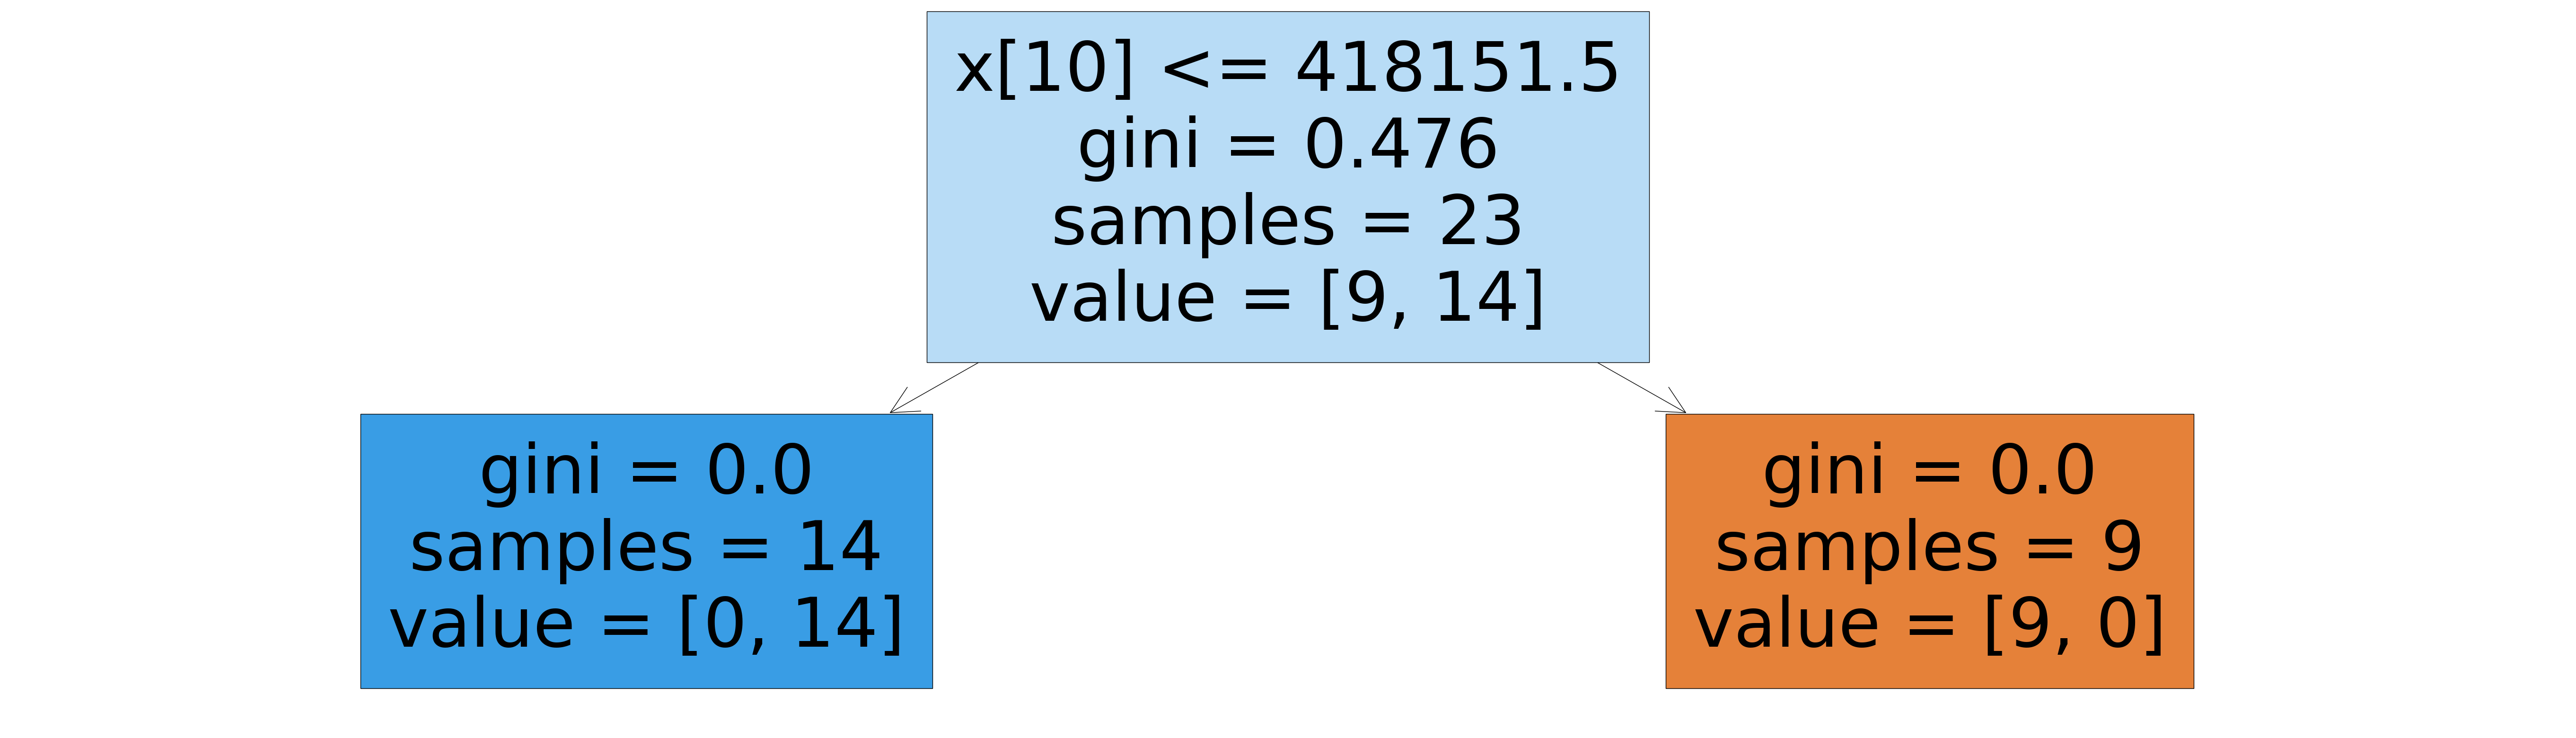

In [ ]:
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion="entropy")
model = model.fit(x_train,y_train)
model.score(x_test, y_test)

1.0

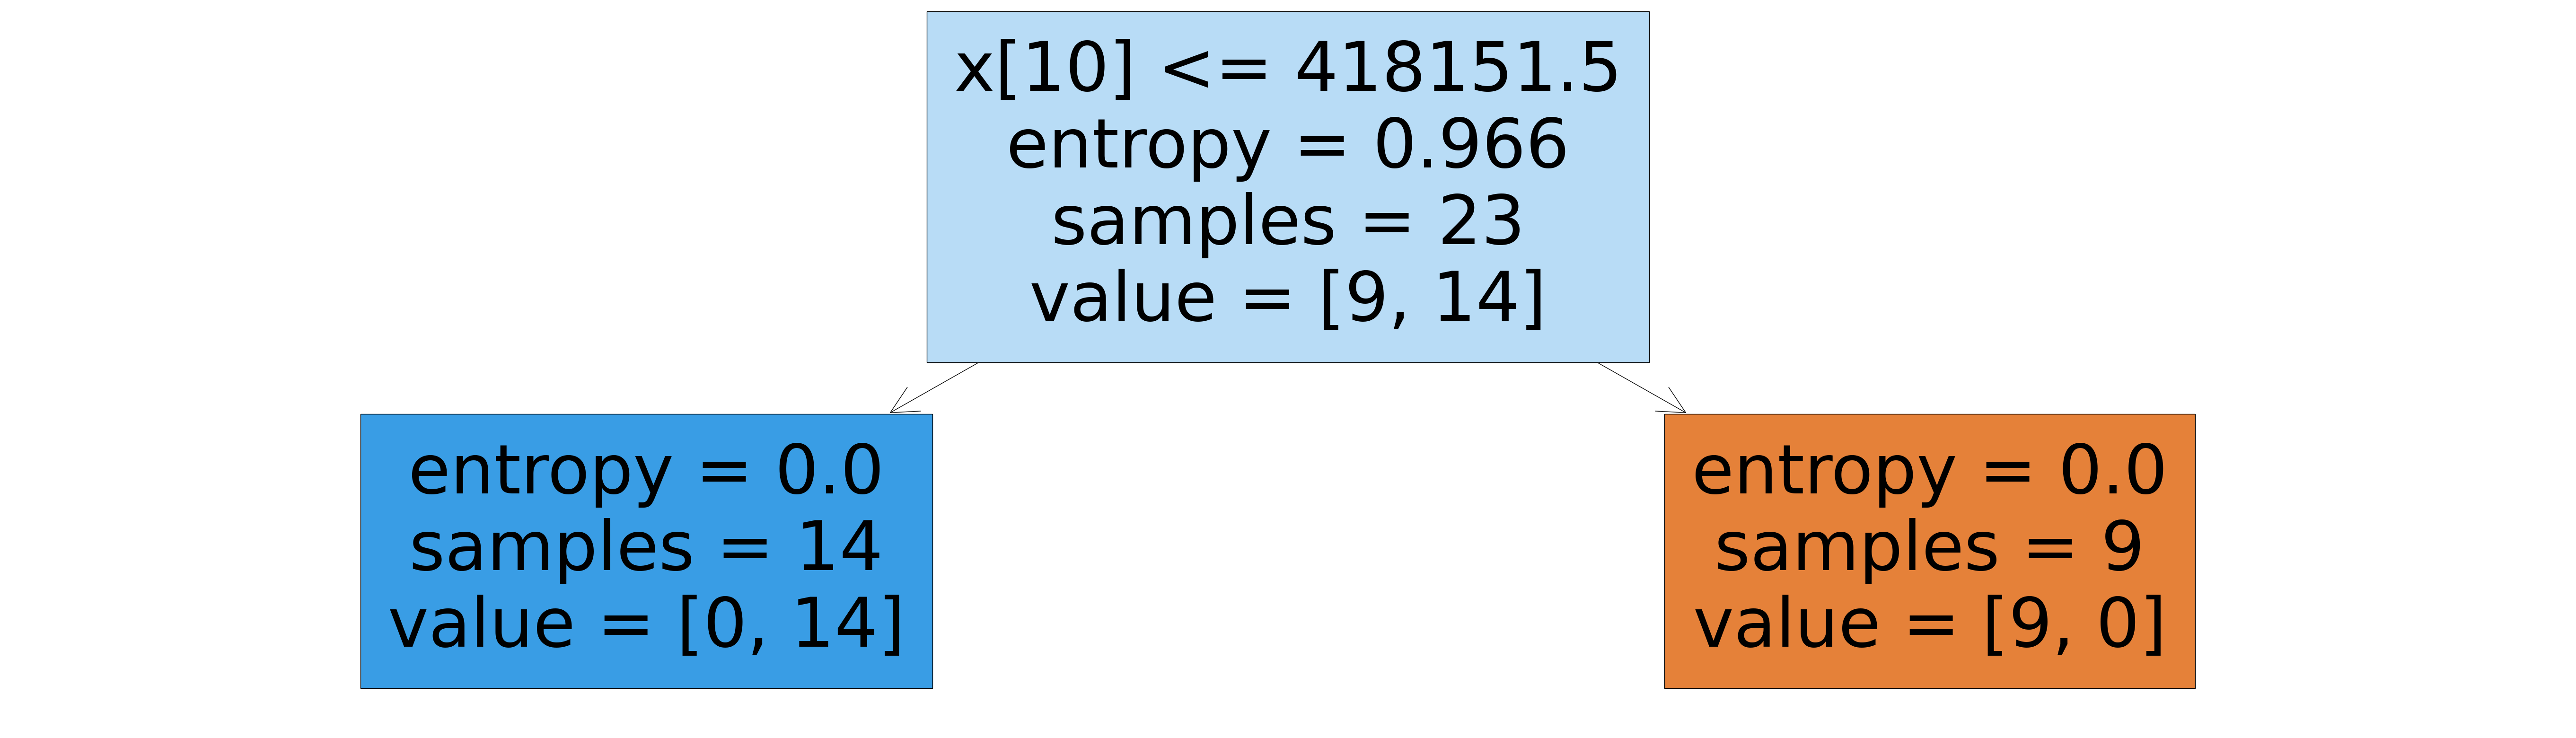

In [ ]:
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()

In [ ]:
model = model.fit(x_train,y_train)
print("Training data Set accuracy is =",model.score(x_train, y_train))
print("Test data Set Accuracy =",model.score(x_test,y_test))

Training data Set accuracy is = 1.0
Test data Set Accuracy = 1.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predict=model.predict(x_test)
predict
y_test

14    High
17     Low
5      Low
22     Low
16     Low
9      Low
Name: classify, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

1.0

In [ ]:
import time
t0 = time.time()
model.fit(x_train,y_train)
model.score(x_test,y_test)
t1 = time.time()
print("Time taken to train and test the data set is", t1-t0)

Time taken to train and test the data set is 0.03481245040893555


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model = RandomForestClassifier()
model = model.fit(x_train,y_train)
print("Training data Set accuracy is =",model.score(x_train, y_train))
print("Test data Set Accuracy =",model.score(x_test,y_test))

Training data Set accuracy is = 1.0
Test data Set Accuracy = 0.6666666666666666


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)


0.3333333333333333

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = SGDClassifier()
model = model.fit(x_train,y_train)
print("Training data Set accuracy is =",model.score(x_train, y_train))
print("Test data Set Accuracy =",model.score(x_test,y_test))

Training data Set accuracy is = 0.782608695652174
Test data Set Accuracy = 0.5


In [ ]:
df5=df['NSDP']>= 405143
df6=df5.replace(to_replace=True,value='1')
df7=df6.replace(to_replace=False,value='0')

In [ ]:
df['classify']=df7

In [ ]:
x= df.drop('classify',axis=1)
y=df['classify']

In [ ]:
print(x.shape)
print(y.shape)

(29, 11)
(29,)


In [ ]:
lr = LinearRegression()
lr.fit(x, y)
pred = lr.predict(x)
pred

array([ 9.24661347e-01, -7.47100042e-04, -1.43609524e-01,  6.85984575e-02,
        1.25443790e-01,  2.39594099e-01,  9.47238988e-01,  7.38142062e-01,
        9.82219265e-02,  2.05824632e-01,  8.90710544e-02,  8.10875963e-01,
        5.34233947e-01,  9.59566276e-01,  1.37830604e+00, -2.21371364e-02,
       -1.73314328e-01,  5.89367168e-02,  7.16816217e-02, -1.42147326e-01,
        5.52201583e-01,  9.24503822e-01,  2.20884128e-02,  1.10026232e+00,
        6.04432031e-01, -8.56555821e-03,  9.88200639e-01,  1.76531509e-01,
        8.71903737e-01])

In [ ]:
print('Intercept:', lr.intercept_)

Intercept: 0.24771207502498827


In [ ]:
reg = lr.fit(x, y)
print("The Linear regression score on training data is ", round(reg.score(x, y),2))

The Linear regression score on training data is  0.83


In [ ]:
df_coeff = pd.DataFrame(lr.coef_, x.columns,columns=['Coefficient'])
df_coeff

,Coefficient
State Name,-1.076937e-02
No. OfVillagesWhere SurveyCompleted,-3.203226e-04
banks,1.817662e-04
ATM,-8.771579e-05
Public Transport,-3.509688e-05
electricity for domestic use,3.404307e-04
Public Distribution System(PDS),2.764119e-06
markets,-5.528838e-05
Middle School,-3.900875e-05
Aanganwadi Centre,4.351310e-05


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, pred)))
print('R2:', np.sqrt(metrics.r2_score(y, pred)))

Mean Absolute Error: 0.1508111835738398
Mean Squared Error: 0.04198871825922029
Root Mean Squared Error: 0.20491148884145147
R2: 0.9093401182758085


In [ ]:
train_pred = lr.predict(x)
residuals = df['NSDP'] - train_pred
residuals.describe()

count    2.900000e+01
mean     4.051433e+05
std      4.190904e+05
min      1.411594e+04
25%      4.742476e+04
50%      3.383391e+05
75%      5.588611e+05
max      1.728577e+06
Name: NSDP, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

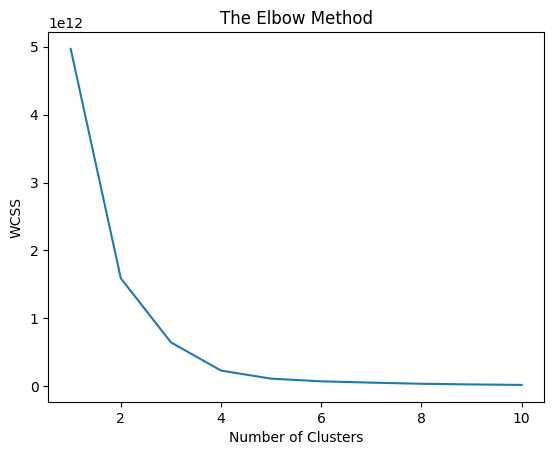

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(x)
print(cluster_labels)

[1 0 0 1 0 0 2 1 0 0 0 2 1 1 2 0 0 0 0 1 1 1 0 2 1 0 2 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
